1. describe componenets

### Loading files & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Not using fist face fixations and second face fixations as well as transitions between face AOIs as variables as they dont exist for all participants due to limiled total number of fixations on facial landmarks in close proximity. - only have 12 participants with these variables

In [2]:
# Load files
main_df = pd.read_csv('/Users/alina/Downloads/Thesis/raw/Participants fixations summary.csv')
full_side_face_df = pd.read_csv('/Users/alina/Downloads/Thesis/raw/Full_side_prop_all_recordings.csv')

merged = pd.merge(main_df, full_side_face_df, on='Participant')

# drop unnecessary columns
columns_to_drop = [
    'Participant',
    'face fixations',
    'body fixations',
    'background fixations',
    'Total fixations',
    'left_eye',
    'right_eye',
    'nose',
    'mouth',
    'matched_fixations',
    'side-faces fixations',
    'full-faces fixations'
]
all_variables_df = merged.drop(columns=columns_to_drop, errors='ignore')
all_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Face detections             22 non-null     int64  
 1   Body detections             22 non-null     int64  
 2   proportion face             22 non-null     float64
 3   proportion body             22 non-null     float64
 4   proportion background       22 non-null     float64
 5   median duration face        22 non-null     float64
 6   median duration body        22 non-null     float64
 7   median duration background  22 non-null     float64
 8   median duration left_eye    21 non-null     float64
 9   median duration right_eye   21 non-null     float64
 10  median duration nose        21 non-null     float64
 11  median duration mouth       22 non-null     float64
 12  proportion left_eye         22 non-null     float64
 13  proportion right_eye        22 non-nu

Median durations of eyes and nose variable exists for 21 out 22 participants.

# Correlations

In [107]:
#all_variables_df['proportion eye'] = all_variables_df['proportion left_eye'] + all_variables_df['proportion right_eye']

code for correlation plot based on https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77 

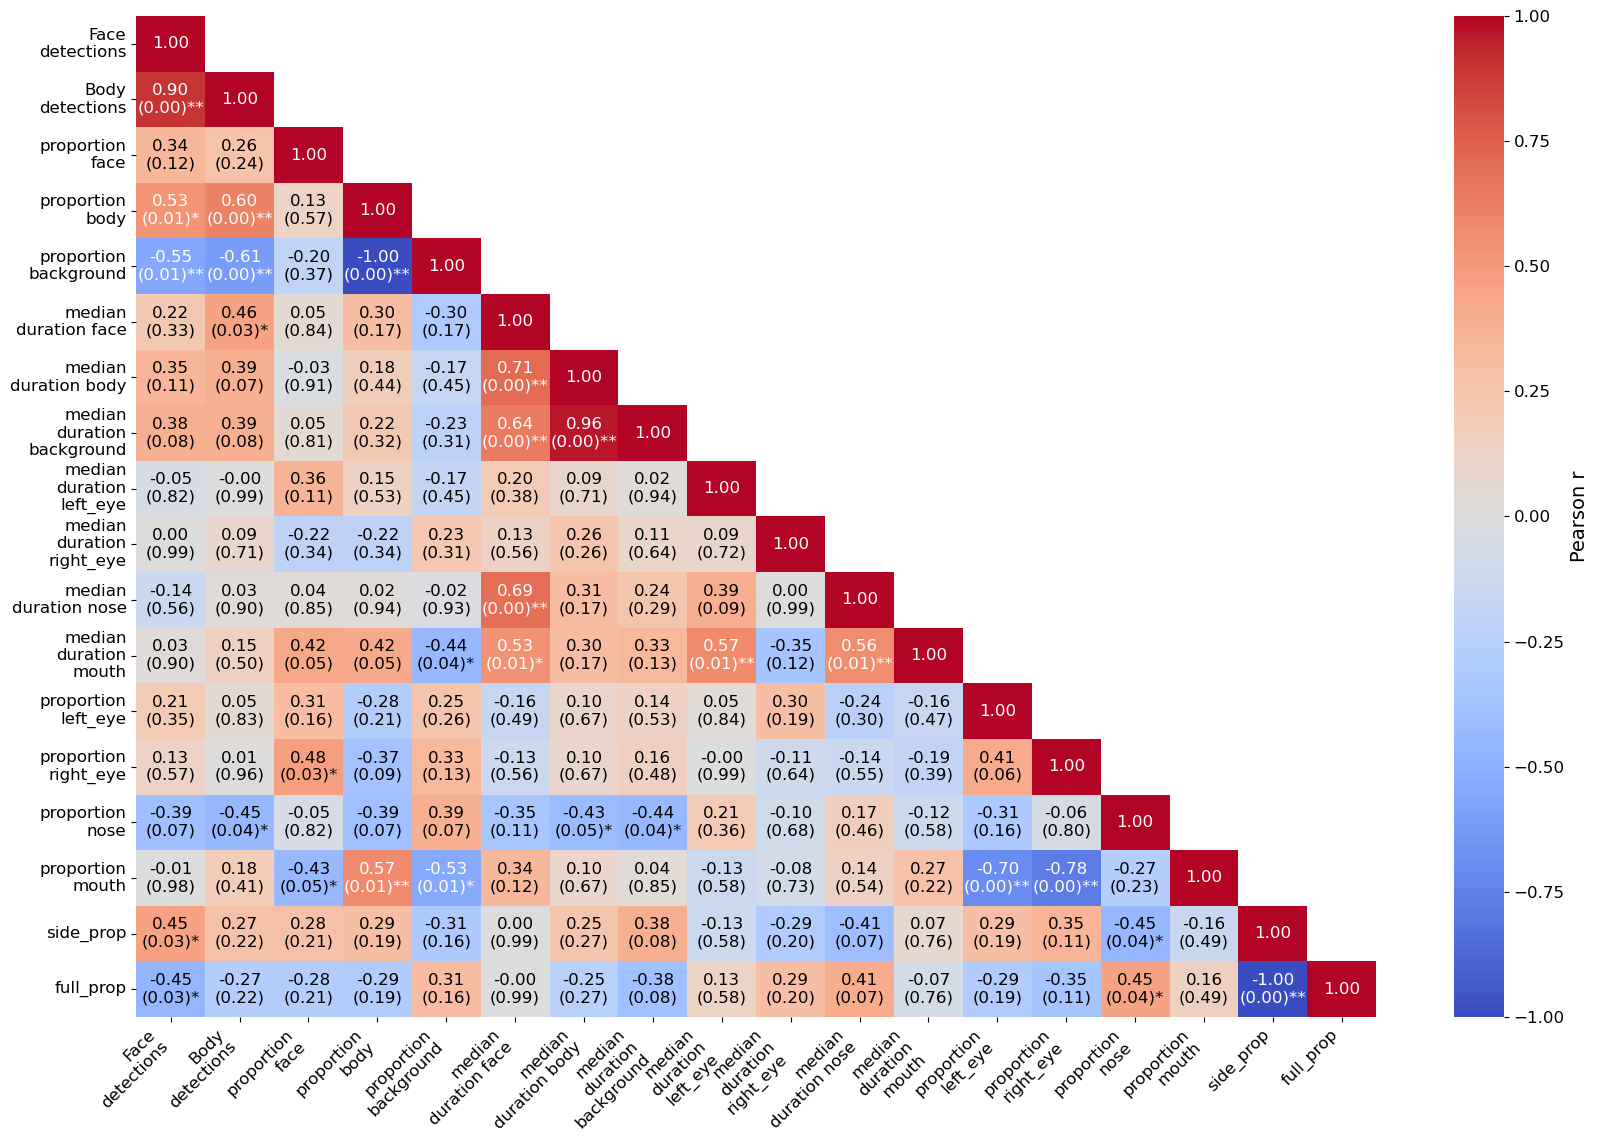

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import textwrap

# Correlation and p-values
corr = all_variables_df.corr(method='pearson')
p_values = pd.DataFrame(np.ones_like(corr), columns=corr.columns, index=corr.index)

for i in range(len(corr.columns)):
    for j in range(i):
        x = all_variables_df.iloc[:, i]
        y = all_variables_df.iloc[:, j]
        valid = ~np.isnan(x) & ~np.isnan(y)
        if valid.sum() > 2:  # need at least 3 points
            r, p = pearsonr(x[valid], y[valid])
            corr.iloc[i, j] = r
            p_values.iloc[i, j] = p

# Mask only the strictly upper triangle (diagonal is kept)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.rcParams.update({
    'font.size': 12,        # default text
    'axes.labelsize': 14,   # x and y labels
    'xtick.labelsize': 12,  # x ticks
    'ytick.labelsize': 12,  # y ticks
    'legend.fontsize': 12   # legend
})

plt.figure(figsize=(20, 13))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, cbar_kws={'label':'Pearson r'})

# Annotate lower triangle and diagonal
for i in range(len(corr.columns)):
    for j in range(i + 1):  # include diagonal
        if i == j:
            text = '1.00'  # correlation with self
            text_color = 'white'
        else:
            r = corr.iloc[i, j]
            p = p_values.iloc[i, j]
            text_color = 'white' if abs(r) > 0.5 else 'black'
            if p <= 0.01:
                text = f'{r:.2f}\n({p:.2f})**'
            elif p <= 0.05:
                text = f'{r:.2f}\n({p:.2f})*'
            else:
                text = f'{r:.2f}\n({p:.2f})'
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=12, color=text_color)

plt.xticks(ticks=np.arange(len(corr.columns)) + 0.5,
           labels=[textwrap.fill(col, 13) for col in corr.columns],
           rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr.columns)) + 0.5,
           labels=[textwrap.fill(col, 13) for col in corr.columns],
           rotation=0, ha='right')

plt.show()





### Correlation only proportions of person-related fixations

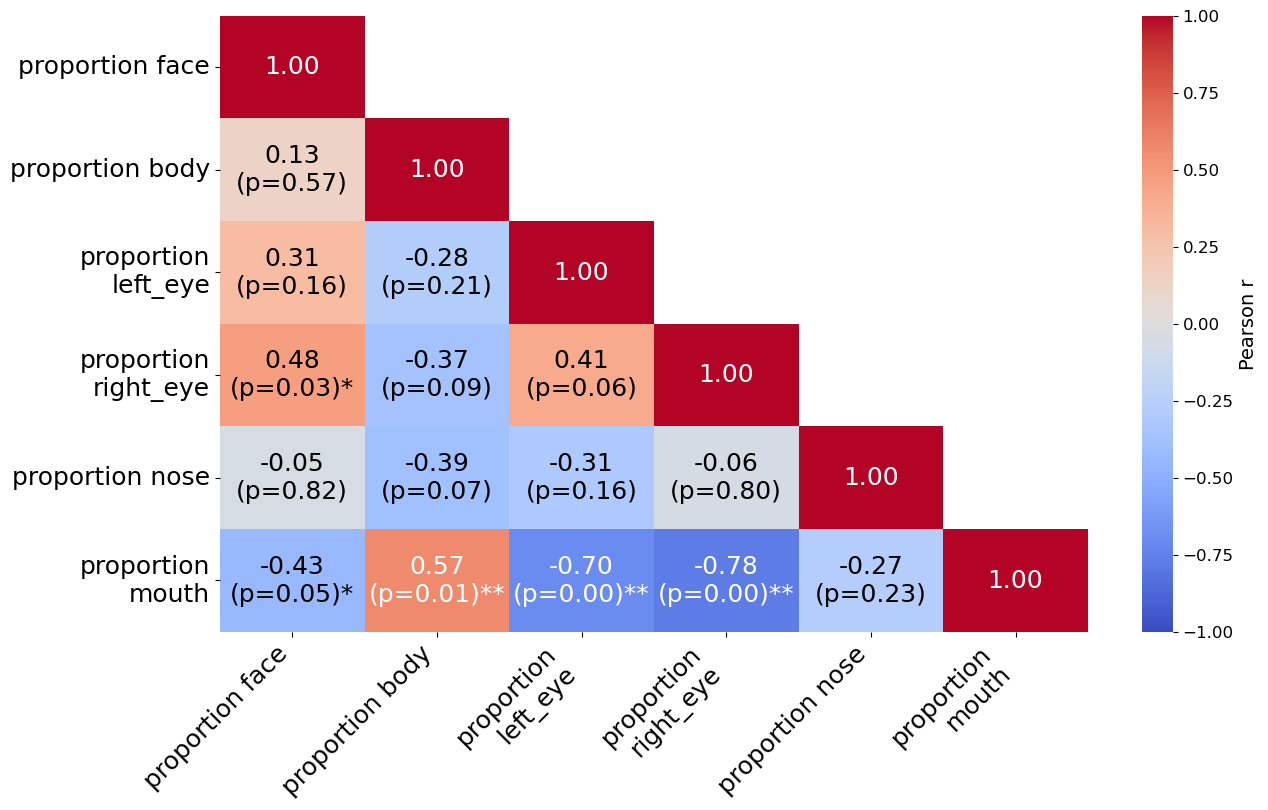

In [25]:

columns_to_drop = [
    'proportion background',
    'median duration background',
    'full_prop',
    'Face detections',
    'median duration left_eye',
    'median duration right_eye',
    'median duration nose',
    'median duration face',
    'median duration mouth',
    'median duration body',
    'Body detections',
    'side_prop'
]

data = all_variables_df.drop(columns=columns_to_drop, errors='ignore')

# Initialize correlation and p-value matrices
corr = pd.DataFrame(np.ones((data.shape[1], data.shape[1])),
                    columns=data.columns, index=data.columns)
p_values = pd.DataFrame(np.ones_like(corr), columns=data.columns, index=data.columns)

# Compute pairwise Pearson correlation and p-values, ignoring NaNs per pair
for i in range(len(data.columns)):
    for j in range(i, len(data.columns)):
        x = data.iloc[:, i]
        y = data.iloc[:, j]
        valid = ~np.isnan(x) & ~np.isnan(y)
        if valid.sum() > 2:  # need at least 3 points
            r, p = pearsonr(x[valid], y[valid])
        else:
            r, p = np.nan, np.nan
        corr.iloc[i, j] = r
        corr.iloc[j, i] = r
        p_values.iloc[i, j] = p
        p_values.iloc[j, i] = p

# Mask strictly upper triangle (keep diagonal visible)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(14, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, cbar_kws={'label':'Pearson r'})

# Annotate lower triangle + diagonal
for i in range(len(corr.columns)):
    for j in range(i + 1):  # include diagonal
        if i == j:
            text = '1.00'  # correlation with self
            text_color = 'white'
        else:
            r = corr.iloc[i, j]
            p = p_values.iloc[i, j]
            text_color = 'white' if abs(r) > 0.5 else 'black'
            if p <= 0.01:
                text = f'{r:.2f}\n(p={p:.2f})**'
            elif p <= 0.05:
                text = f'{r:.2f}\n(p={p:.2f})*'
            else:
                text = f'{r:.2f}\n(p={p:.2f})'
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=18, color=text_color)

# Ticks and labels
plt.xticks(ticks=np.arange(len(corr.columns)) + 0.5,
           labels=[textwrap.fill(col, 15) for col in corr.columns],
           rotation=45, ha='right', fontsize=18)
plt.yticks(ticks=np.arange(len(corr.columns)) + 0.5,
           labels=[textwrap.fill(col, 15) for col in corr.columns],
           rotation=0, ha='right', fontsize=18)

plt.show()


# PCA

1. Based on these correlations, i am removing for PCA face detections and proportion background and background median duration variables; full-face proportion (due to high multicolleniarity). And median duration of eyes and nose variables as some of them have nan values. 
2. can also remove variables with no significant corr - no var like this

In [19]:
## removing variables with very high correlations (>= 0.9 or <= -0.9) and median duration of eyes and nose variables as some of them have nan values
columns_to_drop = [
    'proportion background',
    'median duration background',
    'full_prop',
    'Face detections',
    'median duration left_eye',
    'median duration right_eye',
    'median duration nose'
]
pca_df = all_variables_df.drop(columns=columns_to_drop, errors='ignore')
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Body detections        22 non-null     int64  
 1   proportion face        22 non-null     float64
 2   proportion body        22 non-null     float64
 3   median duration face   22 non-null     float64
 4   median duration body   22 non-null     float64
 5   median duration mouth  22 non-null     float64
 6   proportion left_eye    22 non-null     float64
 7   proportion right_eye   22 non-null     float64
 8   proportion nose        22 non-null     float64
 9   proportion mouth       22 non-null     float64
 10  side_prop              22 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 2.0 KB


In [20]:
X = pca_df.values # or all_variables_df_pca / X_filtered
feature_names = pca_df.columns # or all_variables_df_pca

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


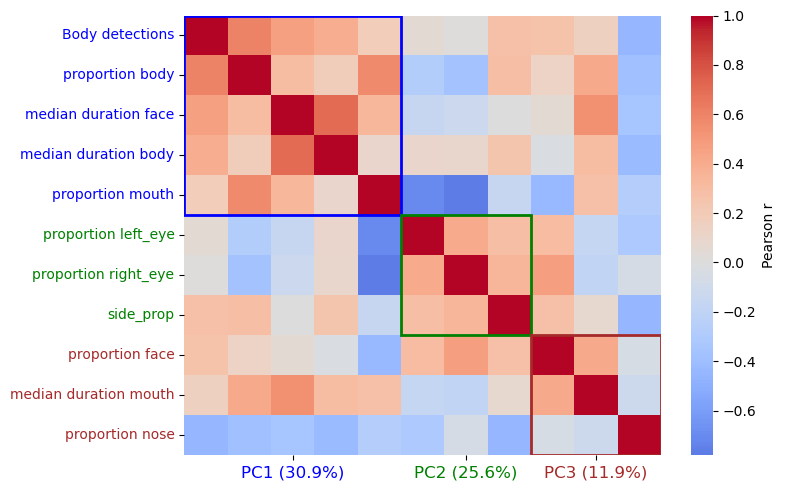

In [22]:
# Number of PCs
n_pcs = 3

# Get loadings
loadings = pd.DataFrame(
    pca.components_[:n_pcs].T,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(n_pcs)]
)

# Explained variance in percentage
explained_var_percent = pca.explained_variance_ratio_[:n_pcs] * 100

# Assign each variable to the PC with highest absolute loading
dominant_pc = loadings.abs().idxmax(axis=1)

# Define colors for each PC
colors = {
    'PC1': 'blue',
    'PC2': 'green',
    'PC3': 'brown',
    'PC4': 'purple',
    'PC5': 'orange'
}
dominant_pc_color = dominant_pc.map(colors)

strong_contributors = (loadings.abs() > 0.2).any(axis=1)

# Sort variables by dominant PC group
sorted_vars = dominant_pc.sort_values().index
X_sorted = pca_df[sorted_vars] #

# Compute variable-variable correlation
corr_matrix = X_sorted.corr()

plt.figure(figsize=(8, 5))
ax = sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                 xticklabels=False, yticklabels=True, cbar_kws={'label': 'Pearson r'})

# Format ytick labels
for tick_label in ax.get_yticklabels():
    var = tick_label.get_text()
    if strong_contributors[var]:
        tick_label.set_weight('normal')
    tick_label.set_color(dominant_pc_color[var])

# Prepare PC labels
pc_order = [f'PC{i+1}' for i in range(n_pcs)]
pc_labels = [f"{pc} ({explained_var_percent[i]:.1f}%)" for i, pc in enumerate(pc_order)]

# Calculate group sizes and centers on x-axis
group_sizes = [sum(dominant_pc == pc) for pc in pc_order]
group_centers = []
start = 0
for size in group_sizes:
    center = start + size / 2
    group_centers.append(center)
    start += size

# Set x ticks and labels with explained variance
ax.set_xticks(group_centers)
ax.set_xticklabels(pc_labels, fontsize=12)

# Color x tick labels accordingly
for xtick, pc in zip(ax.get_xticklabels(), pc_order):
    xtick.set_color(colors[pc])

plt.xticks(rotation=0)

# Draw colored blocks for each PC group
current_idx = 0
for pc_name in pc_order:
    vars_in_group = dominant_pc[dominant_pc == pc_name].index
    n = len(vars_in_group)
    if n == 0:
        continue
    rect = patches.Rectangle((current_idx, current_idx), n, n,
                             linewidth=2, edgecolor=colors[pc_name], facecolor='none')
    ax.add_patch(rect)
    current_idx += n

#plt.title("Correlations grouped by Principle Componenet")
plt.tight_layout()
plt.show()

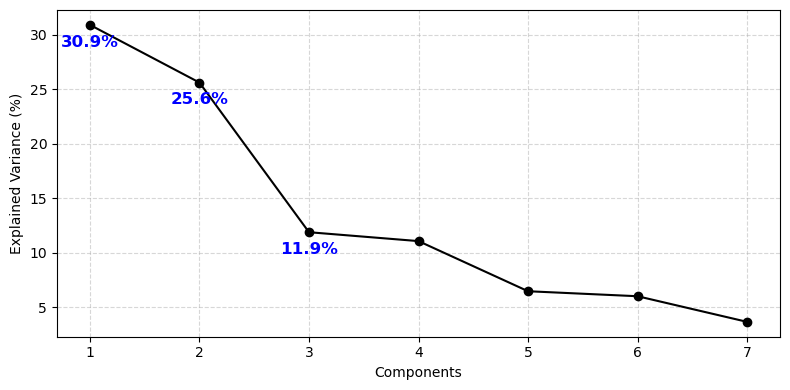

In [23]:
# plot showing the explained variance for each principal component

explained_variance_ratio = pca.explained_variance_ratio_ 
explained_variance_pct = explained_variance_ratio * 100
components = np.arange(1, len(explained_variance_pct) + 1)

plt.figure(figsize=(8, 4))
plt.plot(components, explained_variance_pct, marker='o', color='black')
plt.xticks(components)
plt.xlabel('Components')
plt.ylabel('Explained Variance (%)')
#plt.title('Explained Variance per Principal Component')
plt.grid(True, linestyle='--', alpha=0.5)

annotations = {
    1: {"color": "blue", "label": f"{explained_variance_pct[0]:.1f}%"},
    2: {"color": "blue", "label": f"{explained_variance_pct[1]:.1f}%"},
    3: {"color": "blue", "label": f"{explained_variance_pct[2]:.1f}%"}
}

for pc_num, props in annotations.items():
    x = pc_num
    y = explained_variance_pct[pc_num - 1]
    
    # Place label text slightly above the point, centered horizontally
    plt.annotate(props["label"],
                 xy=(x, y),
                 xytext=(x, y - 2),
                 ha='center',
                 color=props["color"],
                 fontsize=12,
                 fontweight='bold'
                 )

plt.tight_layout()
plt.show()

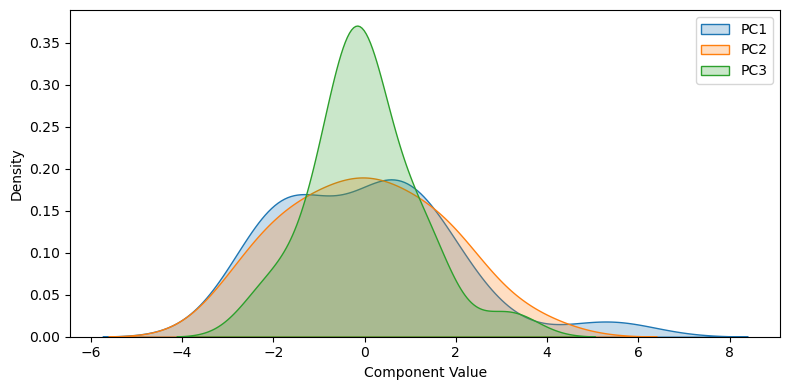

In [24]:
# Create a DataFrame with the first 2 components
pca_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', "PC3"])

# Plot KDEs of PC1, PC2, and PC3
plt.figure(figsize=(8, 4))
for col in pca_df.columns:
    sns.kdeplot(pca_df[col], label=col, fill=True, common_norm=False)

#plt.title('KDE of First Two PCA Components')
plt.xlabel('Component Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

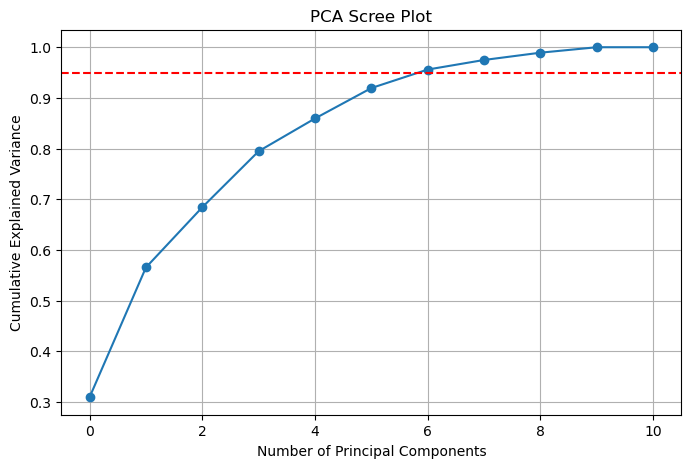

In [25]:
pca_all = PCA()
X_pca_all = pca_all.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--')
plt.show()

In [26]:
top_features = {}

for pc in loadings.columns:
    top = loadings[pc].abs().sort_values(ascending=False).head(3)
    top_features[pc] = top.index.tolist()

top_features

{'PC1': ['proportion body', 'median duration face', 'proportion mouth'],
 'PC2': ['proportion right_eye', 'proportion left_eye', 'proportion face'],
 'PC3': ['median duration mouth', 'proportion face', 'proportion nose']}

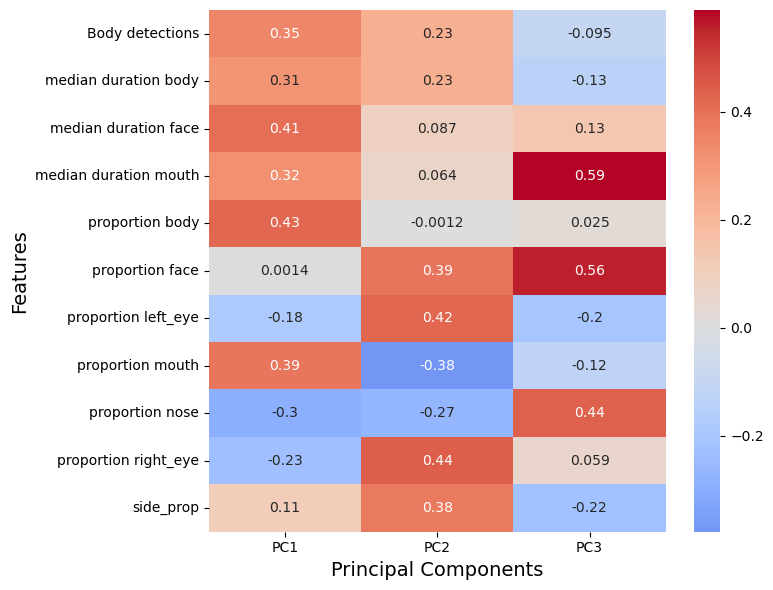

In [27]:
features = {}

for pc in loadings.columns:
    # Get absolute values sorted descending, but don't overwrite the DataFrame
    top_abs = loadings[pc].abs().sort_values(ascending=False)
    # Retrieve the original signed loadings for these features
    sorted_loadings = loadings.loc[top_abs.index, pc]
    features[pc] = sorted_loadings

# Convert features dictionary to DataFrame
sorted_matrix = pd.DataFrame(features)

# Plot a heatmap of the sorted loadings
plt.figure(figsize=(8, 6))
sns.heatmap(sorted_matrix, annot=True, cmap="coolwarm", center=0)
#plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()


# Clustering of face fixations proporion

## distribution of face prop

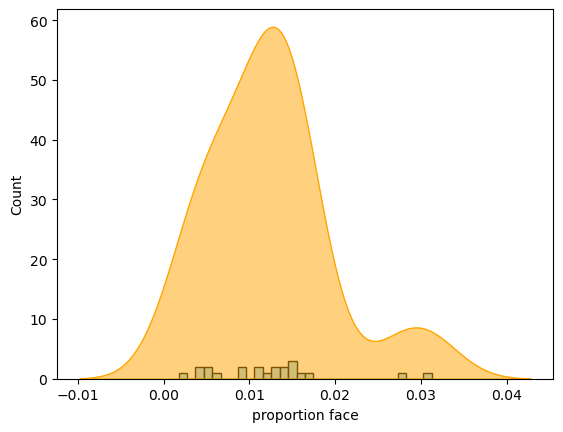

In [3]:
sns.histplot(all_variables_df['proportion face'], bins=30, color="skyblue", edgecolor="black")

sns.kdeplot(all_variables_df['proportion face'], fill=True, color="orange", alpha=0.5)
plt.show()


## Clustering

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [49]:
## preparation for clustering (changing 3 nan values I have to the mean) and standardizing variables

clustering_df = all_variables_df[['proportion face', 'proportion mouth', 'proportion body']] #'proportion left_eye', 'proportion right_eye', 'median duration face', "median duration mouth"]]
#clustering_df['proportion face'] = all_variables_df['proportion face']
clustering_df.info()

# replace NaNs with column means if they are there
nan_change = SimpleImputer(strategy="mean")
X = nan_change.fit_transform(clustering_df)

# standardize (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   proportion face   22 non-null     float64
 1   proportion mouth  22 non-null     float64
 2   proportion body   22 non-null     float64
dtypes: float64(3)
memory usage: 660.0 bytes


In [48]:
#X_scaled

In [140]:
#clustering_df

In [ ]:
## tried clustering by using PCs as variables
"""clustering_df = pd.DataFrame({
    'PC1': pca_df['PC1'],
    'PC2': pca_df['PC2']
})
#clustering_df['proportion face'] = all_variables_df['proportion face']

# replace NaNs with column means
from sklearn.impute import SimpleImputer
nan_change = SimpleImputer(strategy="mean")
X = nan_change.fit_transform(clustering_df)

# standardize (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)"""

In [118]:
plt.rcParams.update({
    'font.size': 12,        # default text
    'axes.labelsize': 14,   # x and y labels
    'xtick.labelsize': 12,  # x ticks
    'ytick.labelsize': 12,  # y ticks
    'legend.fontsize': 12   # legend
})

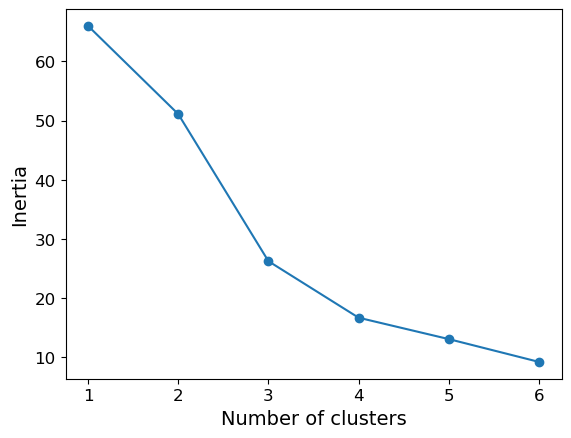

In [119]:
## Look for the "elbow" point — the number of clusters where the line starts flattening (3)
inertias = []
K_range = range(1, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, marker='o')
#plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

In [50]:
# Fit KMeans and get cluster labels
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_df['kcluster'] = kmeans.fit_predict(X_scaled)

#clustering_df[['proportion face', 'proportion mouth', 'proportion body']] = all_variables_df[['proportion face', 'proportion mouth', 'proportion body']] # if PC1 and 2 used as variables

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/48070873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['kcluster'] = kmeans.fit_predict(X_scaled)


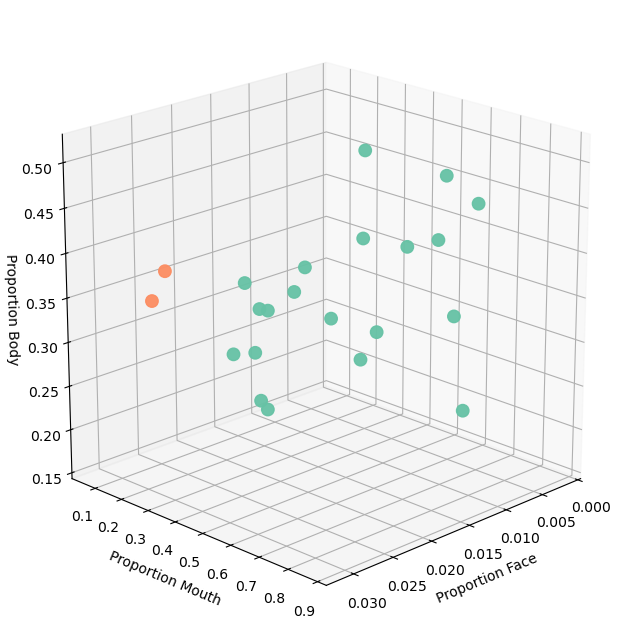

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# same palatte as everywhere else
palette = sns.color_palette("Set2", n_colors=clustering_df['kcluster'].nunique())

# Map cluster labels to colors
colors = clustering_df['kcluster'].map(lambda x: palette[x])

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with categorical colors
scatter = ax.scatter(
    clustering_df['proportion face'],
    clustering_df['proportion mouth'],
    clustering_df['proportion body'],
    c=colors,
    s=80,
    alpha=0.95
)

# Axis labels
ax.set_xlabel('Proportion Face')
ax.set_ylabel('Proportion Mouth')
ax.set_zlabel('Proportion Body')

ax.set_box_aspect([1,1,1])

ax.view_init(elev=20, azim=45)

plt.show()


/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/2642979009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['kcluster'] = kmeans.fit_predict(X_scaled)
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/2642979009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


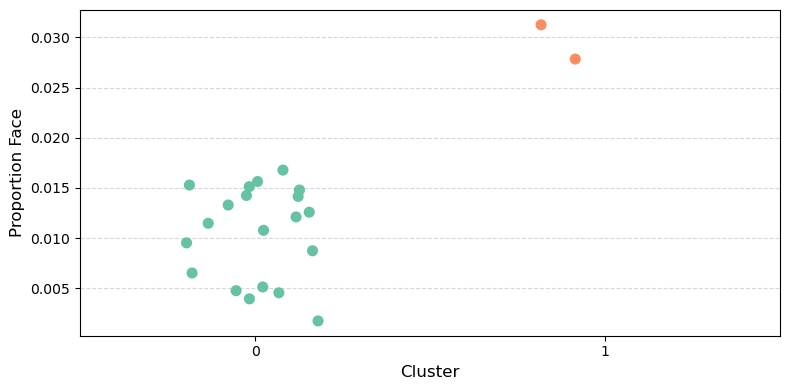

In [55]:
# Fit KMeans and get cluster labels
kmeans = KMeans(n_clusters=2, random_state=42)
clustering_df['kcluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 4))
sns.stripplot(
    data=clustering_df,
    x='kcluster',
    y='proportion face',            #all_variables_df['proportion face'],
    jitter=0.2,
    palette='Set2',
    size=8
)
#plt.title('K-means Clustering of Face Proportions', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proportion Face', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/659006209.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_df, x='kcluster', y='proportion face', ax=axes[0], palette='Set2')
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/659006209.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_df, x='kcluster', y='proportion body', ax=axes[1], palette='Set2')
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/659006209.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

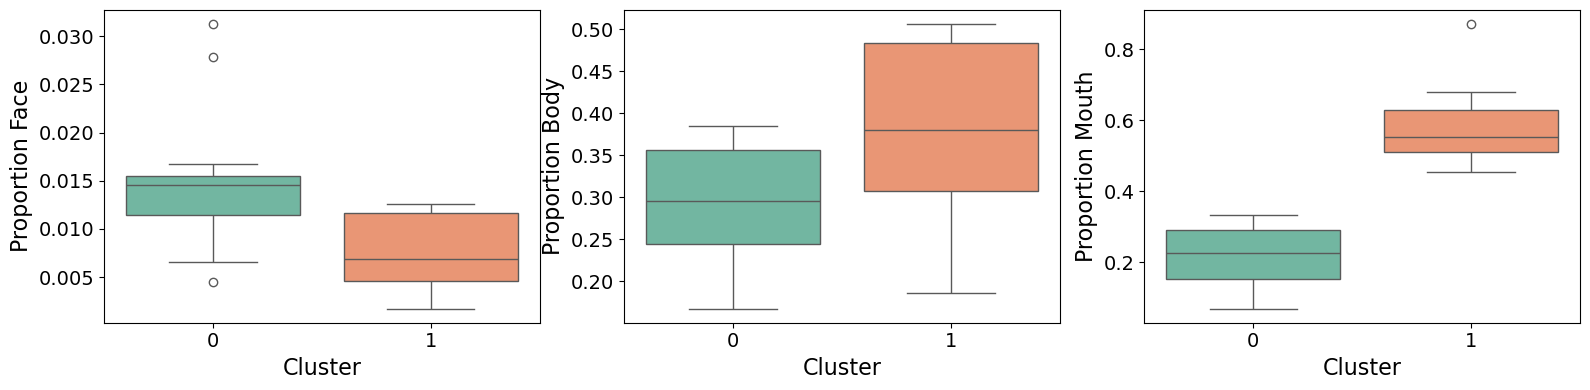

In [44]:
# Box plots for each variable by cluster
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Define font sizes explicitly
label_fontsize = 16
tick_fontsize = 14
title_fontsize = 18

# Face proportions
sns.boxplot(data=clustering_df, x='kcluster', y='proportion face', ax=axes[0], palette='Set2')
axes[0].set_xlabel('Cluster', fontsize=label_fontsize)
axes[0].set_ylabel('Proportion Face', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
#axes[0].set_title('Face Proportions by Cluster', fontsize=title_fontsize)

# Body proportions
sns.boxplot(data=clustering_df, x='kcluster', y='proportion body', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Cluster', fontsize=label_fontsize)
axes[1].set_ylabel('Proportion Body', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
#axes[1].set_title('Body Proportions by Cluster', fontsize=title_fontsize)

# Mouth proportions
sns.boxplot(data=clustering_df, x='kcluster', y='proportion mouth', ax=axes[2], palette='Set2')
axes[2].set_xlabel('Cluster', fontsize=label_fontsize)
axes[2].set_ylabel('Proportion Mouth', fontsize=label_fontsize)
axes[2].tick_params(axis='x', labelsize=tick_fontsize)
axes[2].tick_params(axis='y', labelsize=tick_fontsize)
#axes[2].set_title('Mouth Proportions by Cluster', fontsize=title_fontsize)

plt.tight_layout()
plt.show()


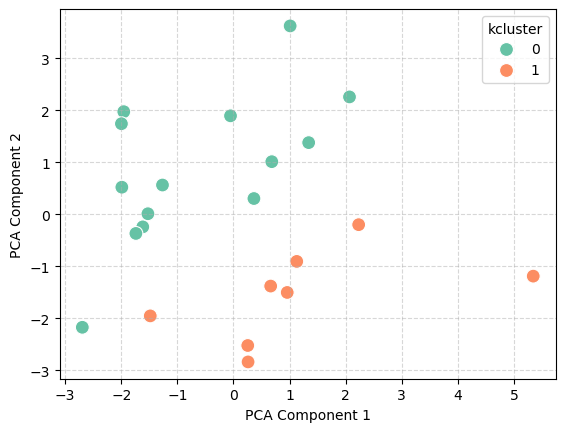

In [45]:
# Assuming you already have univariate clusters in clustering_df['uni_cluster']
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clustering_df['kcluster'],
    palette='Set2',
    s=100
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
#plt.title('PCA of Fixation Proportions with Cluster Labels')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


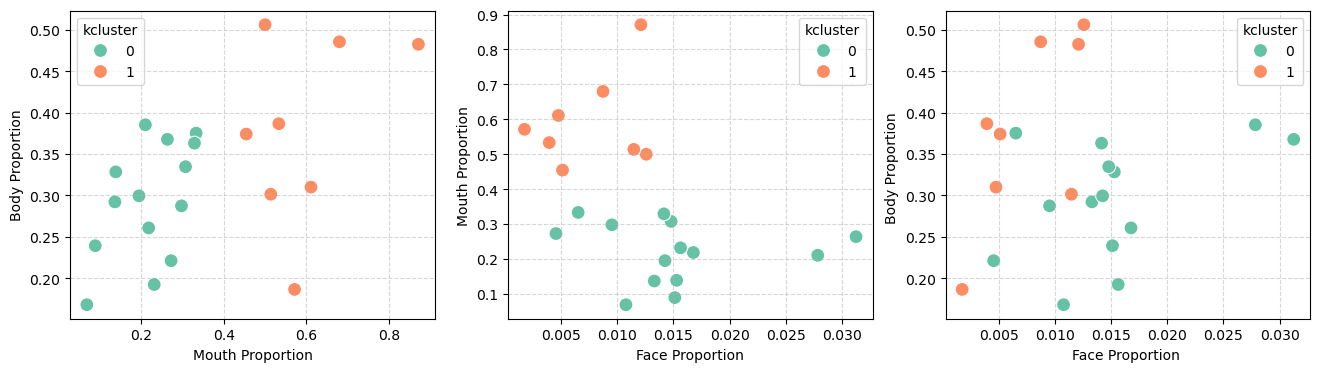

<Figure size 640x480 with 0 Axes>

In [46]:
# Scatter plots for each pair of variables
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# Scatter 1: Body vs Mouth
sns.scatterplot(
    x=X[:,1],  # mouth proportion
    y=X[:,2],  # body proportion
    hue=clustering_df['kcluster'],
    palette='Set2',
    s=100,
    ax=axes[0]
)
axes[0].set_xlabel('Mouth Proportion')
axes[0].set_ylabel('Body Proportion')
#axes[0].set_title('Body vs. Mouth Fixation Proportions')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Scatter 2: Face vs Mouth
sns.scatterplot(
    x=X[:,0],  # face proportion
    y=X[:,1],  # mouth proportion
    hue=clustering_df['kcluster'],
    palette='Set2',
    s=100,
    ax=axes[1]
)
axes[1].set_xlabel('Face Proportion')
axes[1].set_ylabel('Mouth Proportion')
#axes[1].set_title('Face vs. Mouth Fixation Proportions')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Scatter 3: face and body
sns.scatterplot(
    x=X[:,0],  # face proportion
    y=X[:,2],  # body proportion
    hue=clustering_df['kcluster'],
    palette='Set2',
    s=100
)
plt.xlabel('Face Proportion ')
plt.ylabel('Body Proportion ')
#plt.title('Face vs. Body Fixations Proportions by Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


X and Y axes → first two principal components from PCA on all variables. These components are linear combinations of the original variables that capture the most variance.

Each point → one participant.

Color (hue) → cluster assignment from KMeans.

This allows you to see how clusters are separated in a reduced 2D space

### Hierarchical Clustering comparison

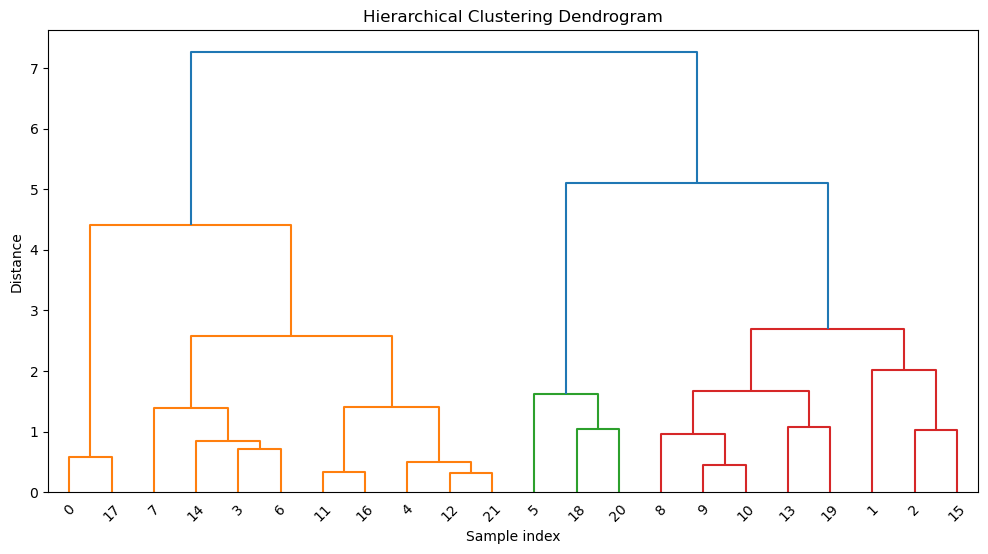

In [52]:
# Compute linkage matrix
Z = linkage(X_scaled, method='ward')  # 'ward' method minimizes variance within clusters 

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # showing last 5 cluster merges
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/1721406517.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df["Cluster"] = clusters
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/1721406517.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


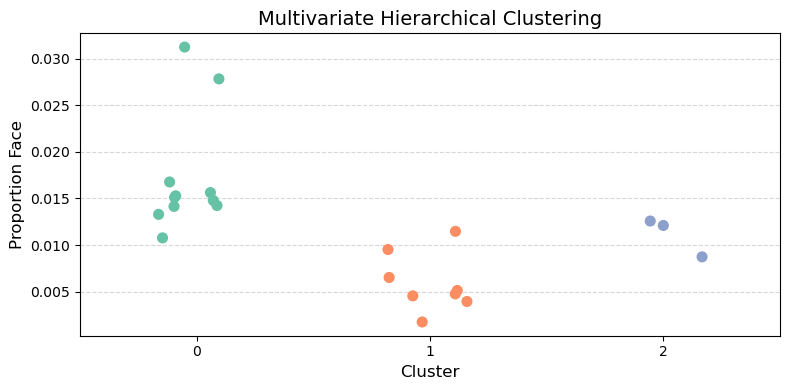

In [53]:
# choose number of clusters
n_clusters = 3

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean', 
    linkage='ward' # 'complete' 'average
)

clusters = hc.fit_predict(X_scaled)

# attach cluster labels to your dataframe
clustering_df["Cluster"] = clusters

plt.figure(figsize=(8, 4))
sns.stripplot(
    data=clustering_df,
    x='Cluster',          
    y='proportion face', 
    jitter=0.2,
    palette='Set2',
    size=8
)
plt.title('Multivariate Hierarchical Clustering', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proportion Face', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


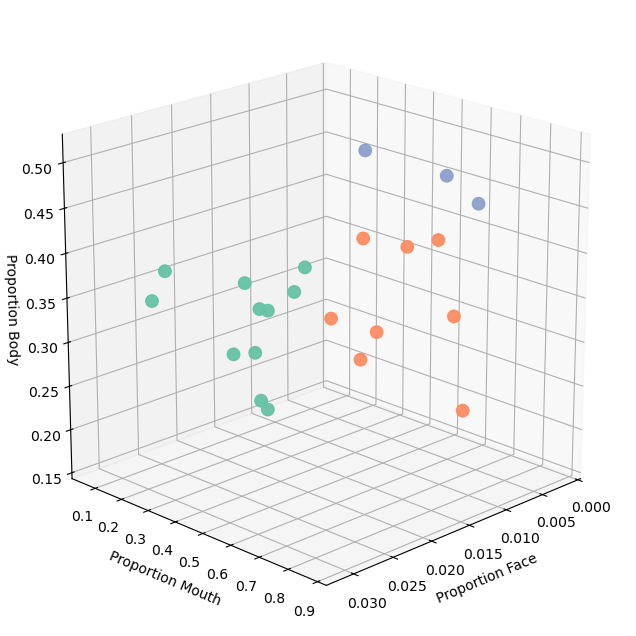

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# same palatte as everywhere else
palette = sns.color_palette("Set2", n_colors=clustering_df['Cluster'].nunique())

# Map cluster labels to colors
colors = clustering_df['Cluster'].map(lambda x: palette[x])

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with categorical colors
scatter = ax.scatter(
    clustering_df['proportion face'],
    clustering_df['proportion mouth'],
    clustering_df['proportion body'],
    c=colors,
    s=80,
    alpha=0.95
)

# Axis labels
ax.set_xlabel('Proportion Face')
ax.set_ylabel('Proportion Mouth')
ax.set_zlabel('Proportion Body')

ax.set_box_aspect([1,1,1])

ax.view_init(elev=20, azim=45)

plt.show()

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_67290/1223577266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_df, x='Cluster', y='proportion face', ax=axes[0], palette='Set2')
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_67290/1223577266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_df, x='Cluster', y='proportion body', ax=axes[1], palette='Set2')
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_67290/1223577266.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

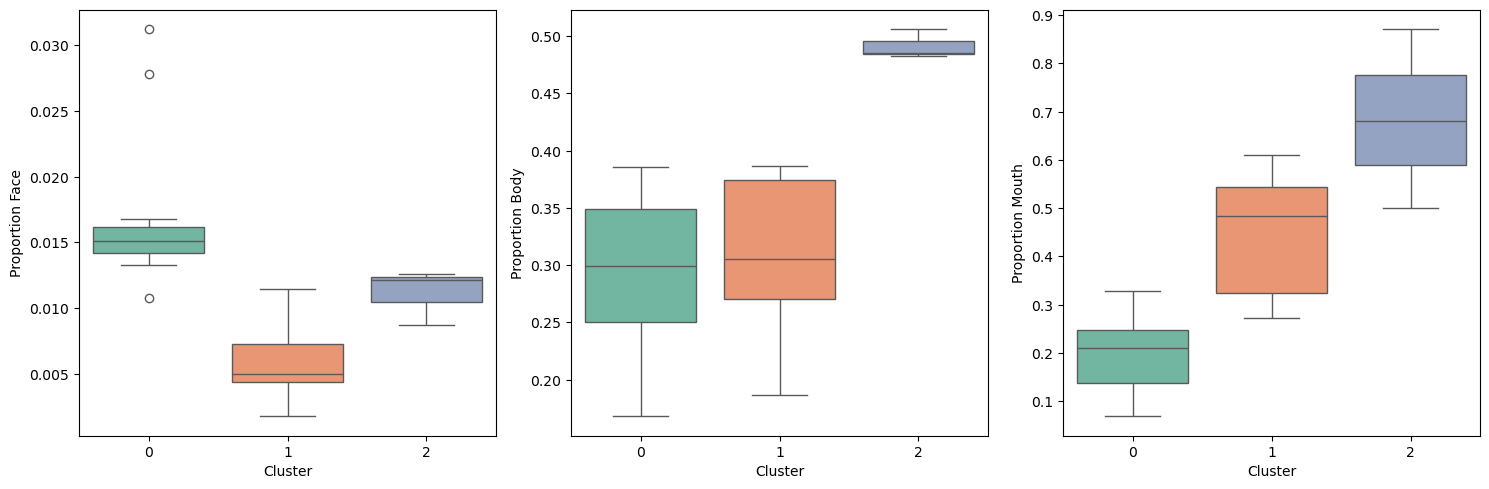

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Face proportions
sns.boxplot(data=clustering_df, x='Cluster', y='proportion face', ax=axes[0], palette='Set2')
#axes[0].set_title('Face Proportions by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion Face')

# Body proportions
sns.boxplot(data=clustering_df, x='Cluster', y='proportion body', ax=axes[1], palette='Set2')
#axes[1].set_title('Body Proportions by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Proportion Body')

# Mouth proportions
sns.boxplot(data=clustering_df, x='Cluster', y='proportion mouth', ax=axes[2], palette='Set2')
#axes[2].set_title('Mouth Proportions by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Proportion Mouth')

plt.tight_layout()
plt.show()

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_67290/2730256563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


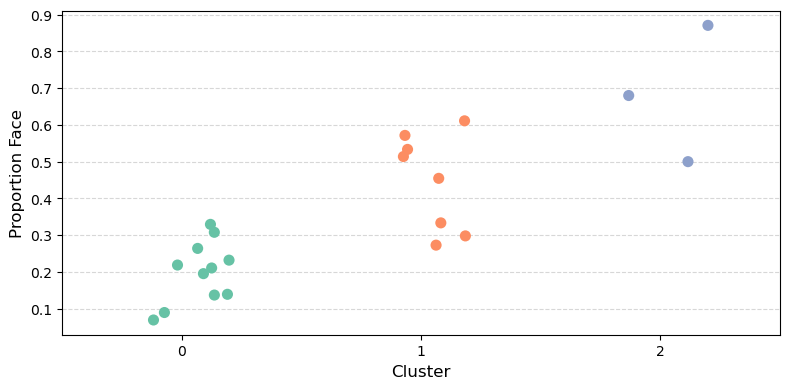

In [91]:

# Plot the clusters
plt.figure(figsize=(8, 4))
sns.stripplot(
    data=clustering_df,
    x='Cluster',
    y='proportion mouth',            #all_variables_df['proportion face'],
    jitter=0.2,
    palette='Set2',
    size=8
)
#plt.title('K-means Clustering of Face Proportions', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proportion Face', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### evaluating clustering 

In [47]:
### evaluating clustering techniques
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette score (closer to 1 is better)
sil_score = silhouette_score(X_scaled, clustering_df['kcluster'])
print(f"Silhouette Score k-means: {sil_score:.3f}")

# Davies–Bouldin index (lower is better)
db_index = davies_bouldin_score(X_scaled, clustering_df['kcluster'])
print(f"Davies–Bouldin Index  k-means: {db_index:.3f}")
# Calinski-Harabasz index (higher is better)
print(f"Calinski-Harabasz Index k-means: {calinski_harabasz_score(X,clustering_df['kcluster']):.3f}")

# Silhouette score (closer to 1 is better)
sil_score = silhouette_score(X_scaled, clustering_df['Cluster'])
print(f"Silhouette Score hierarchical clustering: {sil_score:.3f}")

# Davies–Bouldin index (lower is better)
db_index = davies_bouldin_score(X_scaled, clustering_df['Cluster'])
print(f"Davies–Bouldin Index  hierarchical clustering: {db_index:.3f}")
print(f"Calinski-Harabasz Index hierarchical clustering: {calinski_harabasz_score(X,clustering_df['Cluster']):.3f}")


Silhouette Score k-means: 0.275
Davies–Bouldin Index  k-means: 1.351
Calinski-Harabasz Index k-means: 0.125


KeyError: 'Cluster'

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/94571449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['face_hcluster'] = fcluster(Z, t=3, criterion='maxclust')
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_3338/94571449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


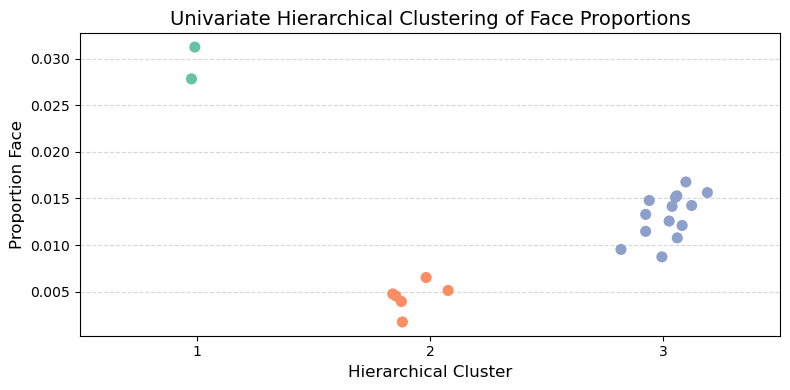

In [8]:
# Univariate Clustering

face_values = clustering_df[['proportion face']].values

# Perform hierarchical clustering
Z = linkage(face_values, method='ward')

# Assign cluster labels (e.g., 3 clusters)
clustering_df['face_hcluster'] = fcluster(Z, t=3, criterion='maxclust')

# Plot the strip plot
plt.figure(figsize=(8, 4))
sns.stripplot(
    data=clustering_df,
    x='face_hcluster',
    y='proportion face',
    jitter=0.2,
    palette='Set2',
    size=8
)
plt.title('Univariate Hierarchical Clustering of Face Proportions', fontsize=14)
plt.xlabel('Hierarchical Cluster', fontsize=12)
plt.ylabel('Proportion Face', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()